In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
from artemis.interactions_methods.model_agnostic import GreenwellMethod
from artemis.interactions_methods.model_agnostic import SejongOhMethod
from artemis.utilities.domain import VisualisationType

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
model = RandomForestRegressor().fit(X, y)

In [3]:
vint = GreenwellMethod()
vint.fit(model, X, 15, show_progress=True)  # all features - GreenwellVariableInteraction

Calculating variable importance: 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]


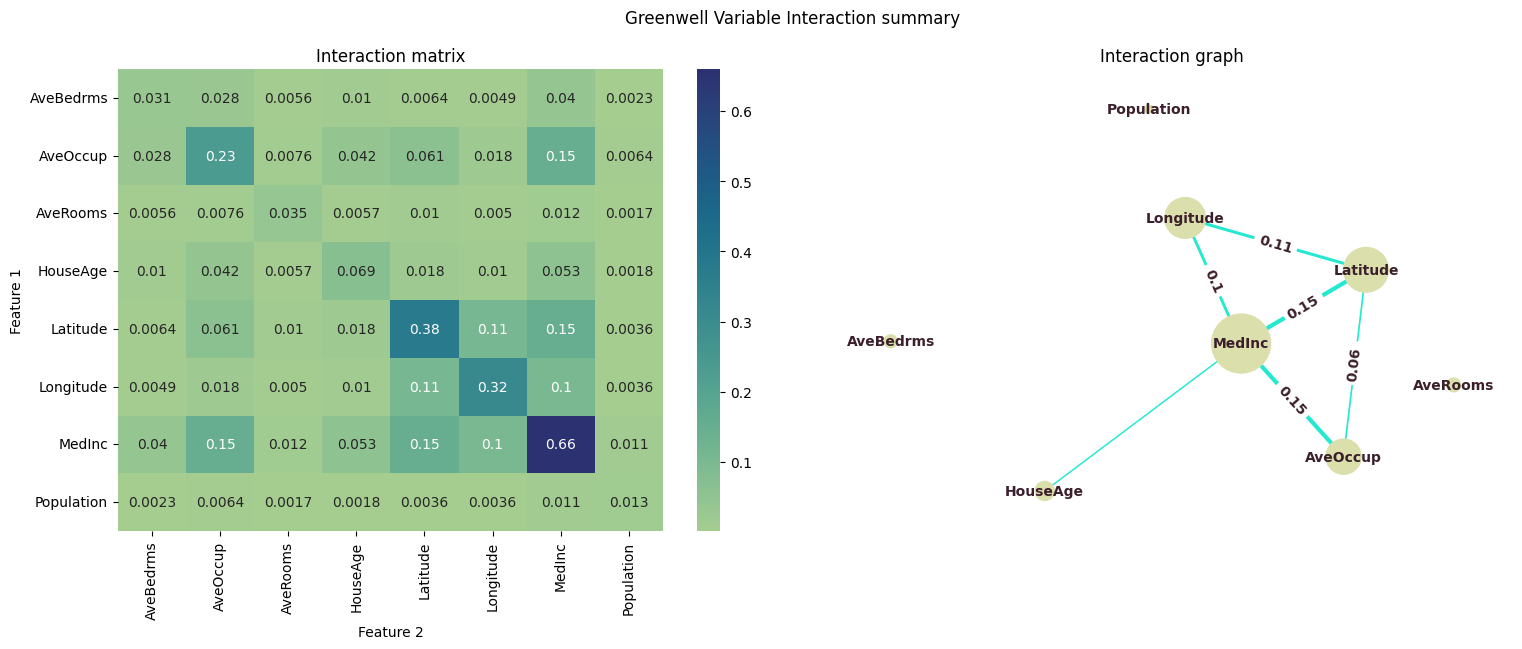

In [4]:
vint.plot()  # summary - GreenwellVariableInteraction

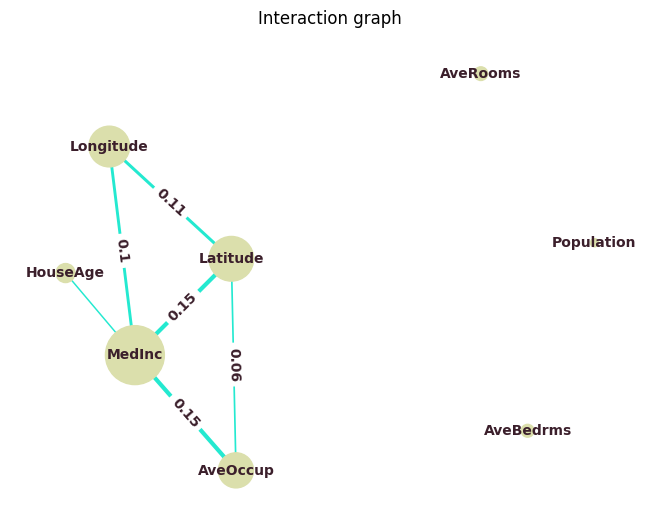

In [5]:
vint.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - GreenwellVariableInteraction

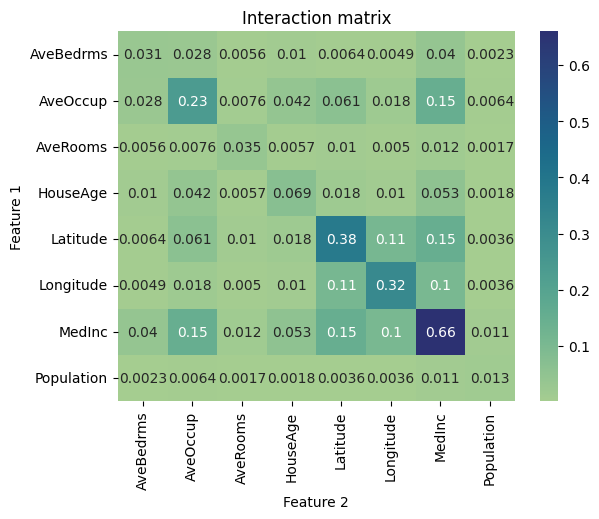

In [6]:
vint.plot(VisualisationType.HEATMAP)  # heatmap - GreenwellVariableInteraction

In [7]:
vint_subset = GreenwellMethod()
vint_subset.fit(model, X, 5, features=["Latitude", "Longitude", "HouseAge"],
                show_progress=True)  # subset of features - GreenwellVariableInteraction

Calculating variable importance: 100%|██████████| 3/3 [00:00<00:00, 20.78it/s]


In [4]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, X, 50, show_progress=True)  # all features - FriedmanHStatistic

Calculating one vs all profile: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


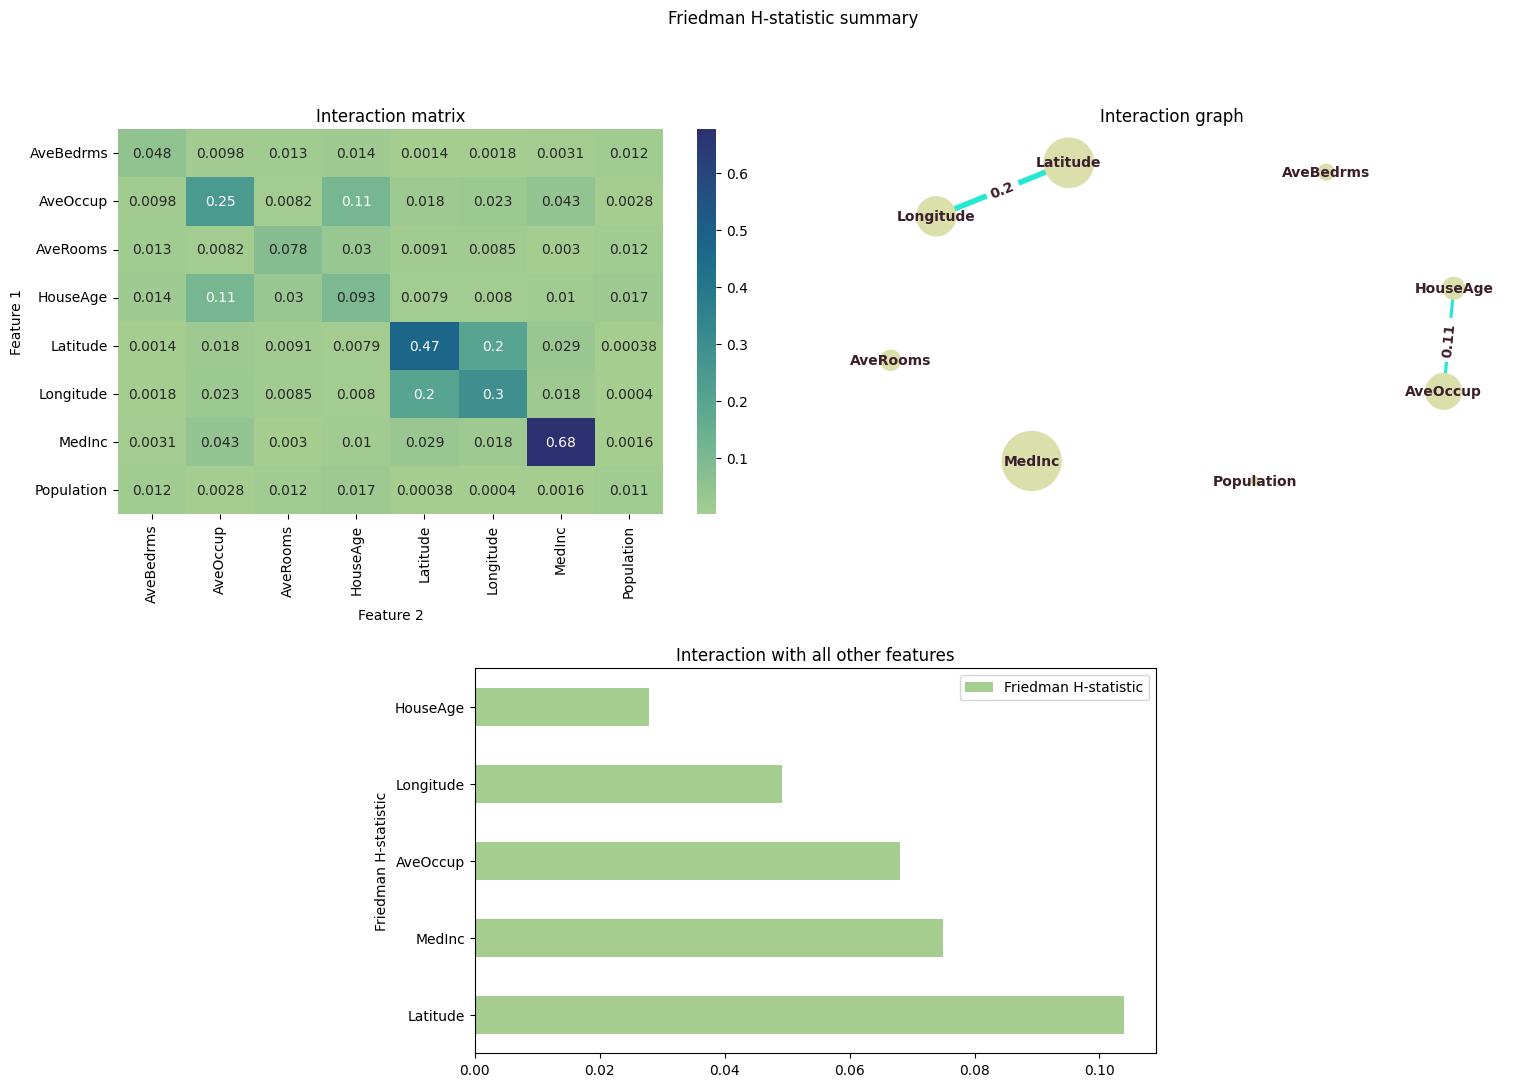

In [9]:
h_stat.plot()

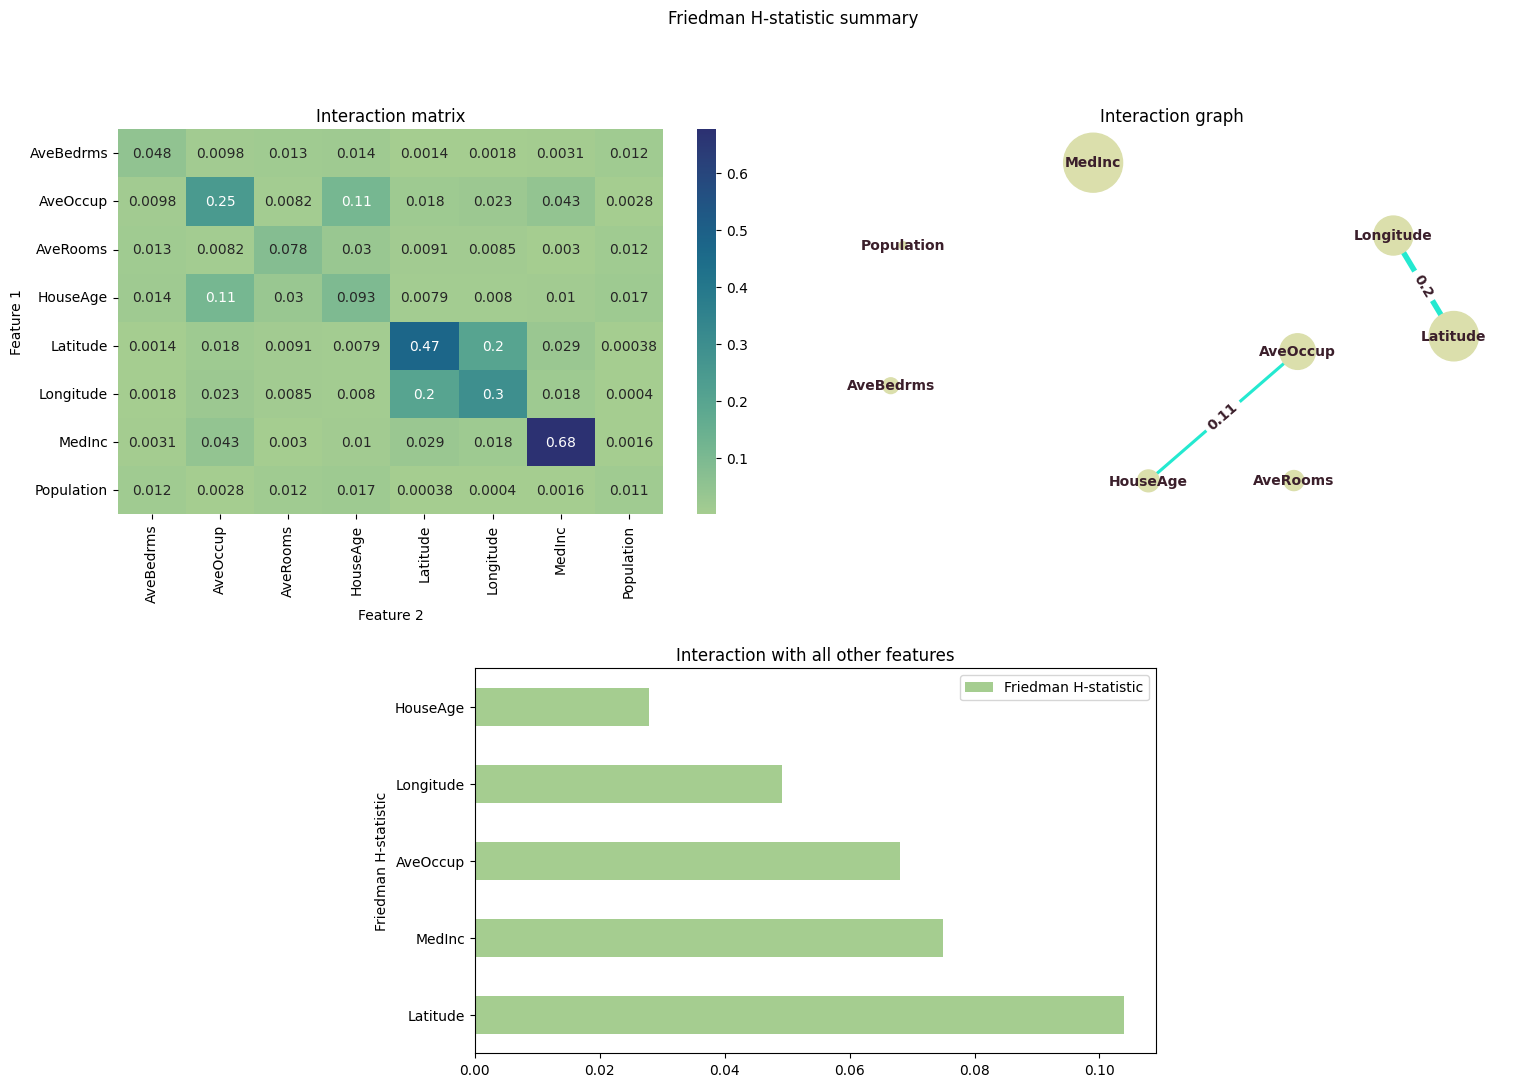

In [10]:
h_stat.plot()  # summary - FriedmanHStatistic

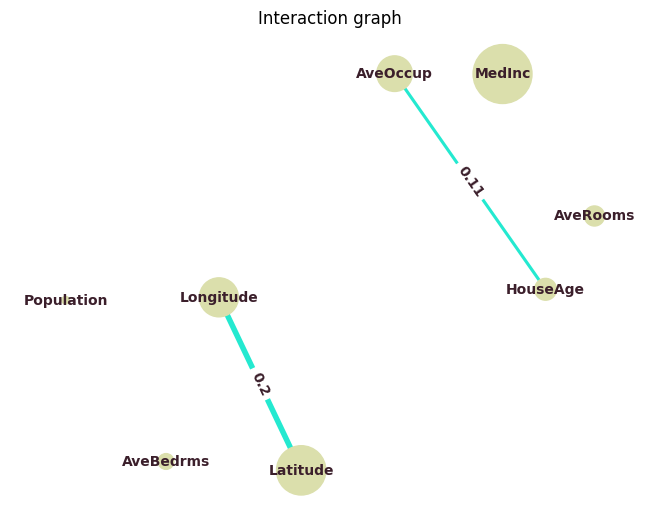

In [11]:
h_stat.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - FriedmanHStatistic

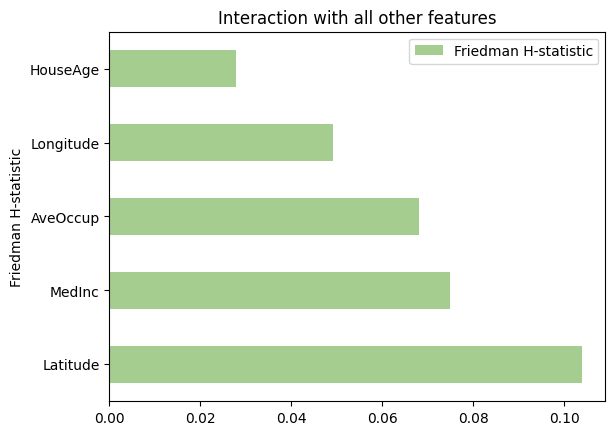

In [12]:
h_stat.plot(VisualisationType.BAR_CHART)  # bar chart - FriedmanHStatistic

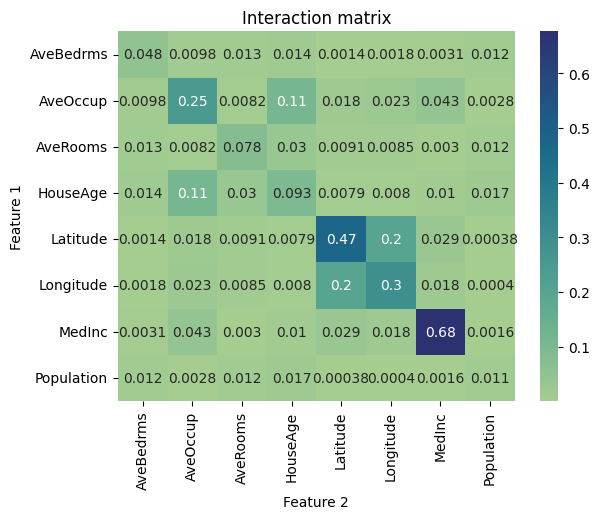

In [13]:
h_stat.plot(VisualisationType.HEATMAP)  # heatmap - FriedmanHStatistic

In [14]:
h_stat_subset = FriedmanHStatisticMethod()
h_stat_subset.fit(model, X, 10, features=["Latitude", "Longitude", "HouseAge"],
                  show_progress=True)  # subset of features - FriedmanHStatistic

Calculating one vs all profile: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


In [3]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 50, show_progress=True)  # all features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:01<00:00,  9.76it/s]


In [4]:
perf_based.ovo

,Feature 1,Feature 2,Sejong Oh Performance Based
0,Latitude,Longitude,0.564406
1,MedInc,Latitude,0.423291
2,MedInc,Longitude,0.308182
3,MedInc,AveOccup,0.275866
4,AveOccup,Latitude,0.273897
5,AveOccup,Longitude,0.225175
6,AveRooms,Latitude,0.220721
7,MedInc,HouseAge,0.216650
8,HouseAge,Longitude,0.154621
9,HouseAge,AveOccup,0.153476


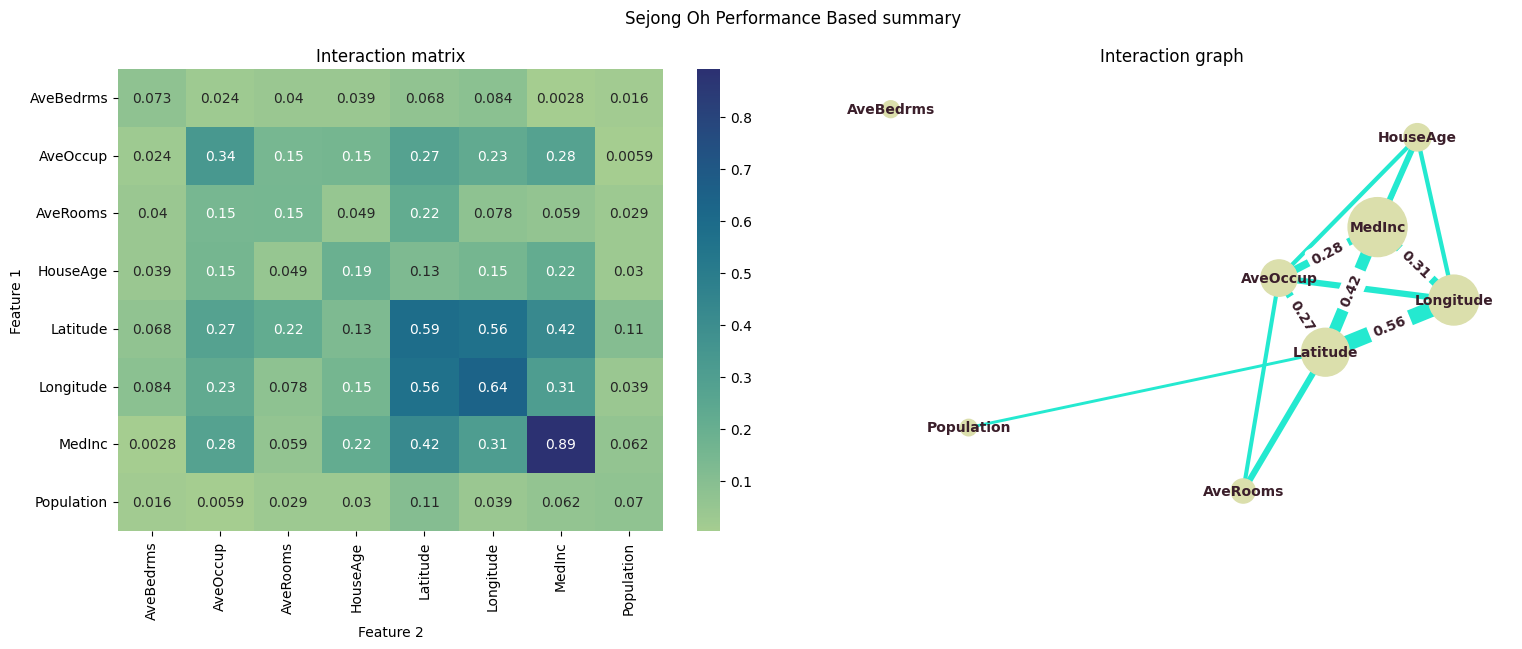

In [5]:
perf_based.plot()  # summary - SejongOhInteraction

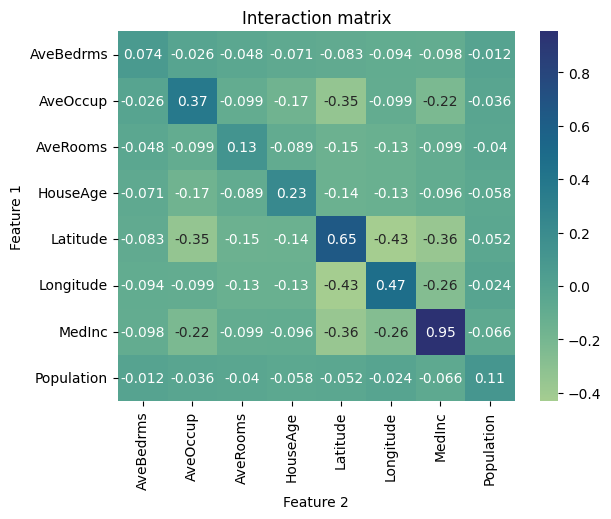

In [18]:
perf_based.plot(VisualisationType.HEATMAP)  # heatmap - SejongOhInteraction

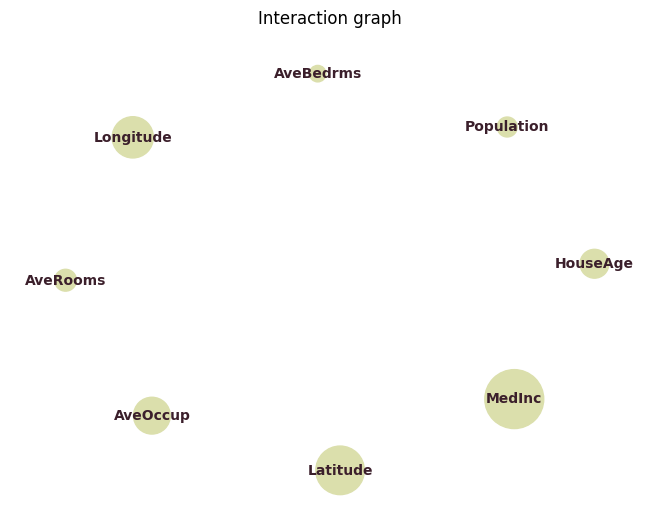

In [19]:
perf_based.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - SejongOhInteraction

In [20]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 500, features=["Latitude", "Longitude", "HouseAge"],
               show_progress=True)  # subset of features - SejongOhInteraction

Calculating variable importance: 100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


In [21]:
perf_based.ovo

,Feature 1,Feature 2,Sejong Oh Performance Based
0,Longitude,HouseAge,-0.184676
1,Latitude,HouseAge,-0.197456
2,Latitude,Longitude,-0.545674


In [22]:
h_stat.variable_importance

,Feature,Value
0,MedInc,0.676735
1,Latitude,0.473577
2,Longitude,0.296218
3,AveOccup,0.246891
4,HouseAge,0.092850
5,AveRooms,0.078244
6,AveBedrms,0.048422
7,Population,0.011168


In [23]:
vint.variable_importance

,Feature,Value
0,MedInc,0.659814
1,Latitude,0.378933
2,Longitude,0.315056
3,AveOccup,0.233776
4,HouseAge,0.068543
5,AveRooms,0.035468
6,AveBedrms,0.031450
7,Population,0.012686
